# 3.	Evaluate the statistical description for stock market analysis with data visualization. - Sukrutha G (ENG20DS0040)

In [1]:
from scipy.stats import skew,kurtosis,norm,skewtest,kurtosistest
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
!pip install yfinance

  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


In [4]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [5]:
name = 'GOOG'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d",start="2015-03-15",end="2020-09-10")
x = df['Close']


In [6]:
returns = x.pct_change(1).dropna()
returns[0:10]

Date
2015-03-17 00:00:00-04:00   -0.006618
2015-03-18 00:00:00-04:00    0.015721
2015-03-19 00:00:00-04:00   -0.002699
2015-03-20 00:00:00-04:00    0.004247
2015-03-23 00:00:00-04:00   -0.002766
2015-03-24 00:00:00-04:00    0.020365
2015-03-25 00:00:00-04:00   -0.020002
2015-03-26 00:00:00-04:00   -0.006469
2015-03-27 00:00:00-04:00   -0.012303
2015-03-30 00:00:00-04:00    0.006729
Name: Close, dtype: float64

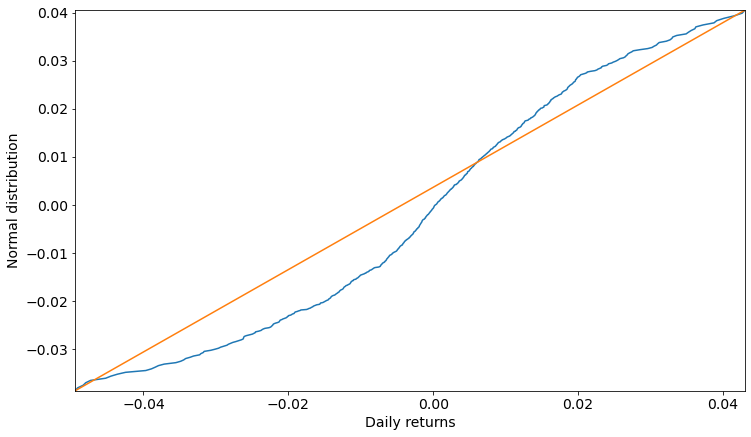

In [7]:
t = np.linspace(0.01,0.99,1000)

q1 = np.quantile(returns,t)

q2 = norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])

plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))

plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()